## **Random Forest Forecasting**

Random Forest를 활용한 2006년 ~ 2017년의 미국 주식 거래량 TOP 20 주식 가격 예측

In [ ]:
# 필요한 package 불러오기
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!git clone https://github.com/KU-DIC/LG_time_series_day06.git

fatal: destination path 'LG_time_series_day06' already exists and is not an empty directory.


In [ ]:
# import dataset

data = pd.read_csv('/content/LG_time_series_day06/Data_random_forest_stock_prediction.csv')
data.head()

,Unnamed: 0,Date,AABA,AAPL,AMZN,AXP,BA,CAT,CSCO,CVX,...,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM
0,0,2006-01-03,39.69,10.34,47.47,51.70,70.40,57.87,17.21,57.25,...,26.25,10.85,23.65,58.30,44.85,62.60,56.45,30.20,46.36,56.42
1,1,2006-01-04,41.22,10.73,47.48,52.44,70.08,57.95,17.48,59.08,...,26.77,10.71,23.97,58.80,45.99,61.89,56.80,30.57,46.24,58.60
2,2,2006-01-05,40.93,10.69,47.16,51.90,70.55,59.02,17.94,58.68,...,26.96,10.69,24.55,58.70,46.79,62.23,56.30,31.28,46.00,58.57
3,3,2006-01-06,42.88,10.75,47.97,52.64,70.34,59.47,18.51,58.95,...,26.89,10.79,24.70,58.74,47.00,62.75,56.45,31.60,45.69,58.76
4,4,2006-01-09,43.10,10.96,46.55,52.82,69.28,60.45,18.97,59.49,...,26.93,10.72,24.98,58.45,46.71,62.90,56.37,31.39,45.89,59.80


In [ ]:
del data['Unnamed: 0']
data.columns 

Index(['Date', 'AABA', 'AAPL', 'AMZN', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX',
       'DIS', 'GE', 'GOOGL', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO',
       'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX',
       'VZ', 'WMT', 'XOM'],
      dtype='object')

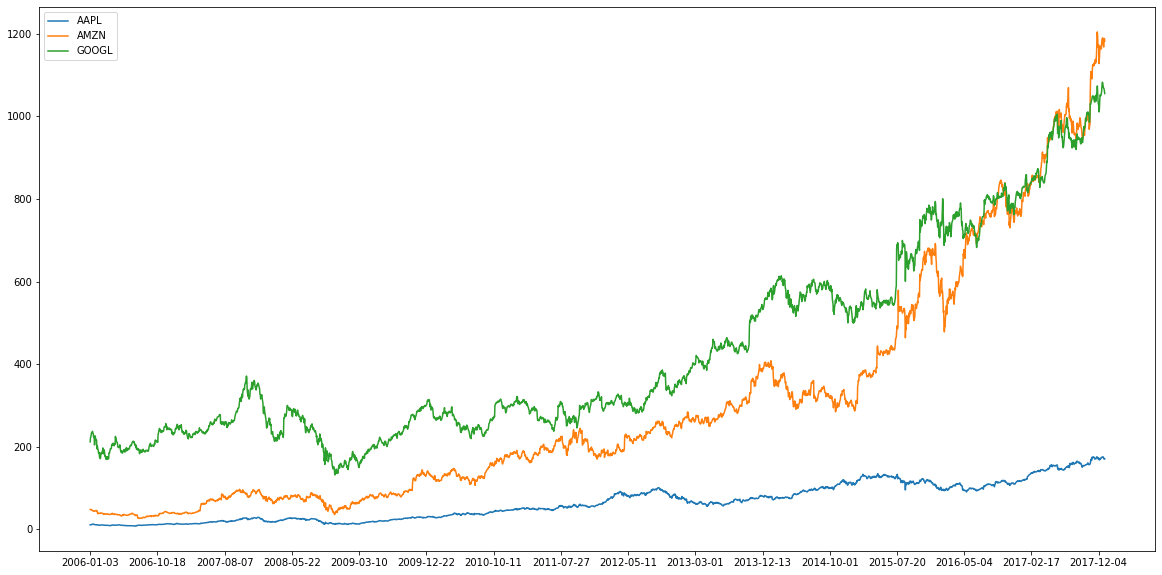

In [ ]:
# visualize the data

plt.figure(figsize=(20,10))
plt.plot(data['Date'].astype('str'),data['AAPL'], label='AAPL')
plt.plot(data['Date'].astype('str'),data['AMZN'], label='AMZN')
plt.plot(data['Date'].astype('str'),data['GOOGL'], label='GOOGL')
plt.legend()
plt.xticks(range(0, 3020, 200)) # x축 설정

plt.show()

In [ ]:
data = data.set_index("Date") # set datetime as the index of dataframe
data = data.dropna() # drop the missing values
columns = data.columns
columns

Index(['AABA', 'AAPL', 'AMZN', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GE',
       'GOOGL', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM',
       'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ', 'WMT',
       'XOM'],
      dtype='object')

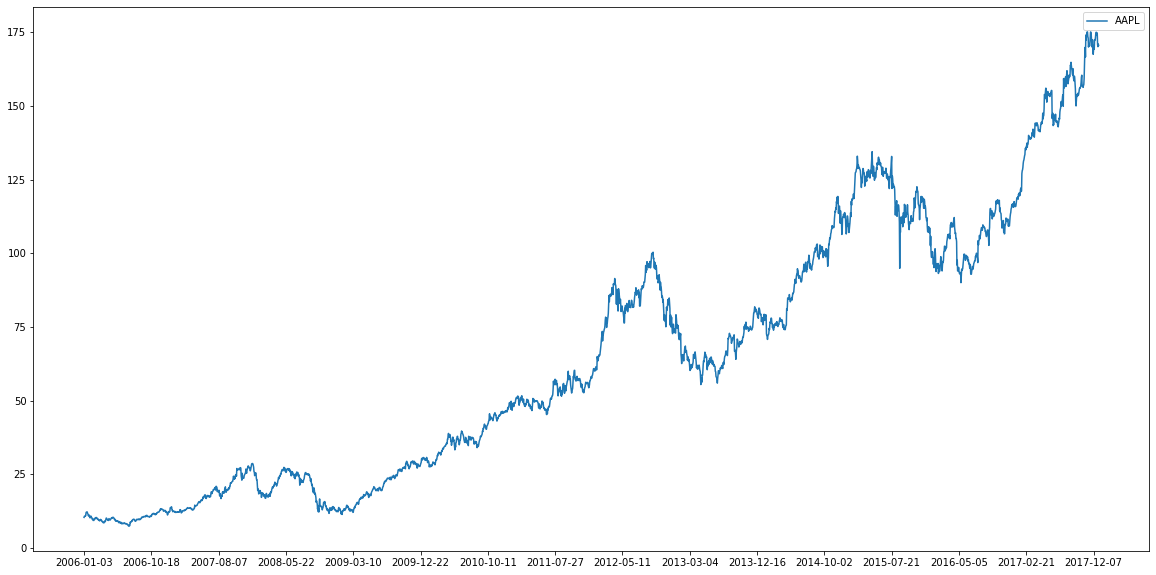

In [ ]:
# visualize the AAPL (target)

plt.figure(figsize = (20,10))

plt.plot(data.index, data['AAPL'], label='AAPL')
plt.legend()
plt.xticks(range(0, 3020, 200))

plt.show()

> 차분(differencing): 시계열 수준에서 나타나는 변화(추세, 계절성)에 대해 제거하여, 평균 변화를 일정하게 만드는 방법

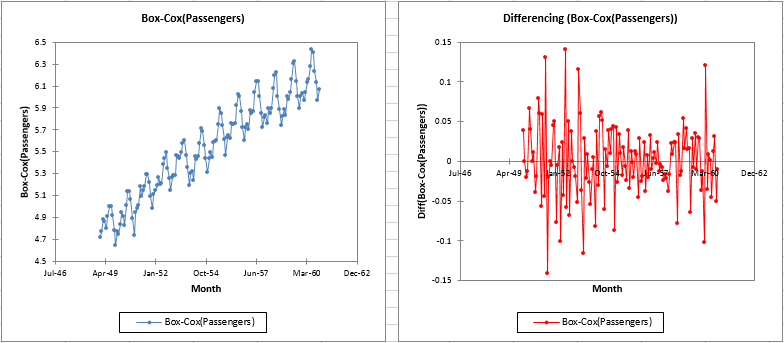

In [ ]:
# make a feature "diff" which means the variations of stocks between today and yesterday

data_diff = pd.DataFrame(columns = columns)
data_diff['Date'] = data.index

for col in columns:
    data_diff[col] = pd.DataFrame(np.diff(data[col])) # np.diff() : differentiation between stock of today and stock of yesterday

data_diff = data_diff.dropna()

In [ ]:
data_diff

,AABA,AAPL,AMZN,AXP,BA,CAT,CSCO,CVX,DIS,GE,...,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM,Date
0,1.53,0.39,0.01,0.74,-0.32,0.08,0.27,1.83,0.42,0.25,...,-0.14,0.32,0.50,1.14,-0.71,0.35,0.37,-0.12,2.18,2006-01-03
1,-0.29,-0.04,-0.32,-0.54,0.47,1.07,0.46,-0.40,-0.37,-0.08,...,-0.02,0.58,-0.10,0.80,0.34,-0.50,0.71,-0.24,-0.03,2006-01-04
2,1.95,0.06,0.81,0.74,-0.21,0.45,0.57,0.27,0.52,0.11,...,0.10,0.15,0.04,0.21,0.52,0.15,0.32,-0.31,0.19,2006-01-05
3,0.22,0.21,-1.42,0.18,-1.06,0.98,0.46,0.54,0.20,0.02,...,-0.07,0.28,-0.29,-0.29,0.15,-0.08,-0.21,0.20,1.04,2006-01-06
4,-0.14,-0.07,-0.14,0.76,-0.48,0.90,-0.10,-0.73,0.17,-0.13,...,0.09,-0.25,0.44,0.34,-1.45,0.07,0.41,-0.39,-0.60,2006-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010,0.42,0.51,-3.82,-0.66,-0.65,0.76,-0.36,1.11,-1.90,-0.17,...,-0.10,-0.45,-0.14,-0.57,0.01,-0.12,-0.30,-0.45,0.75,2017-12-21
3011,-0.48,-3.88,-3.72,-0.58,-1.72,2.08,0.03,3.46,-0.23,0.05,...,-3.09,-0.27,0.22,-1.18,-1.12,0.27,0.30,-0.71,0.53,2017-12-22
3012,-1.17,-0.70,11.55,0.33,-0.79,1.27,-0.01,0.38,-1.00,-0.06,...,1.70,-0.18,0.47,0.20,-2.91,-0.07,0.02,0.06,0.08,2017-12-26
3013,0.35,0.90,9.09,0.10,0.87,0.90,0.19,0.73,-0.07,0.01,...,0.66,0.22,0.14,0.03,0.89,0.01,0.28,1.21,0.03,2017-12-27


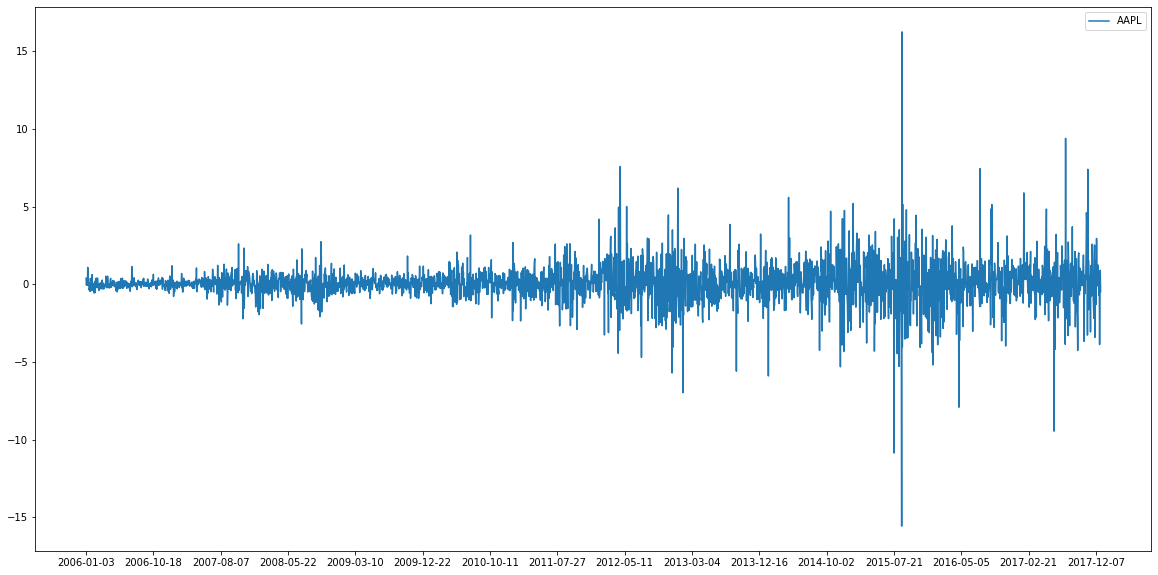

In [ ]:
# visualize the diff of AAPL (example)

plt.figure(figsize = (20,10))
plt.plot(data_diff['Date'].astype('str'),data_diff['AAPL'], label='AAPL')
plt.legend()
plt.xticks(range(0, 3020, 200))

plt.show()

In [ ]:
# make features from (t-5) time to (t) time using "AAPL" colum

lags = pd.DataFrame()

for i in range(5,0,-1):
    lags['t-'+str(i)] = data_diff["AAPL"].shift(i) # make columns; (t-i) time
    lags['t'] = data_diff['AAPL'].values

lags

,t-5,t,t-4,t-3,t-2,t-1
0,NaN,0.39,NaN,NaN,NaN,NaN
1,NaN,-0.04,NaN,NaN,NaN,0.39
2,NaN,0.06,NaN,NaN,0.39,-0.04
3,NaN,0.21,NaN,0.39,-0.04,0.06
4,NaN,-0.07,0.39,-0.04,0.06,0.21
...,...,...,...,...,...,...
3010,1.23,0.51,1.25,0.11,-0.12,-0.70
3011,1.25,-3.88,0.11,-0.12,-0.70,0.51
3012,0.11,-0.70,-0.12,-0.70,0.51,-3.88
3013,-0.12,0.90,-0.70,0.51,-3.88,-0.70


In [ ]:
lags = lags[5:]
lags

,t-5,t,t-4,t-3,t-2,t-1
5,0.39,1.09,-0.04,0.06,0.21,-0.07
6,-0.04,0.16,0.06,0.21,-0.07,1.09
7,0.06,0.00,0.21,-0.07,1.09,0.16
8,0.21,0.10,-0.07,1.09,0.16,0.00
9,-0.07,-0.37,1.09,0.16,0.00,0.10
...,...,...,...,...,...,...
3010,1.23,0.51,1.25,0.11,-0.12,-0.70
3011,1.25,-3.88,0.11,-0.12,-0.70,0.51
3012,0.11,-0.70,-0.12,-0.70,0.51,-3.88
3013,-0.12,0.90,-0.70,0.51,-3.88,-0.70


In [ ]:
# Rolling mean for smoothing the previous 80 days (example: AAPL)

data_mean = data['AAPL'].rolling(window = 80).mean() # 앞 80일의 평균을 현재 값으로 사용
data_mean = data_mean.dropna()

In [ ]:
data_mean

Date
2006-04-27      9.972000
2006-04-28      9.966625
2006-05-01      9.958875
2006-05-02      9.950500
2006-05-03      9.944375
                 ...    
2017-12-22    164.524000
2017-12-26    164.613500
2017-12-27    164.679750
2017-12-28    164.770375
2017-12-29    164.868000
Name: AAPL, Length: 2937, dtype: float64

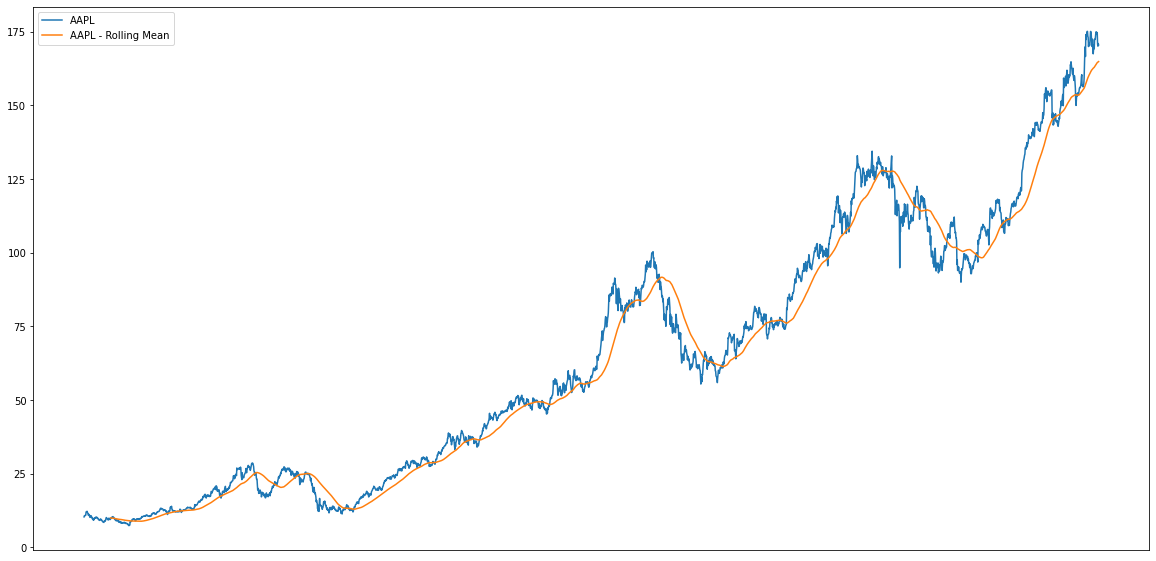

In [ ]:
# visualize the smoothing data

plt.figure(figsize=(20,10))
plt.plot(data.index,data['AAPL'], label='AAPL')
plt.plot(data_mean, label='AAPL - Rolling Mean')
plt.plot()
plt.legend()
plt.xticks([])

plt.show()

In [ ]:
# Rolling mean for all features

data_mean = pd.DataFrame(columns=columns)
print(columns)
for col in data.columns:
  data_mean[col] = data[col].rolling(window = 80).mean()

Index(['AABA', 'AAPL', 'AMZN', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GE',
       'GOOGL', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM',
       'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ', 'WMT',
       'XOM'],
      dtype='object')


In [ ]:
data_mean

,AABA,AAPL,AMZN,AXP,BA,CAT,CSCO,CVX,DIS,GE,...,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,68.506375,164.524000,1062.338625,92.735125,262.447000,132.608375,34.716625,116.658750,101.634625,21.372000,...,79.822125,55.755375,35.626750,90.605375,128.728875,207.094625,118.317625,48.610625,87.839875,81.645250
2017-12-26,68.586875,164.613500,1064.759375,92.898750,263.138750,133.091500,34.797250,116.874625,101.722250,21.284750,...,79.963125,55.860375,35.661625,90.602875,128.872500,207.414875,118.424750,48.670375,88.083250,81.740750
2017-12-27,68.656875,164.679750,1067.205750,93.058750,263.820500,133.567625,34.876250,117.090000,101.790875,21.197750,...,80.099875,55.989125,35.694000,90.608625,129.033125,207.691875,118.522500,48.731250,88.330125,81.836875


**Modeling part**

In [ ]:
# aggregating the features (pre-processing)

df_forecasting = pd.DataFrame(data["AAPL"])
df_forecasting["AAPL_diff"] = df_forecasting["AAPL"].diff()

for i in range(5,0,-1):
    df_forecasting['t-'+str(i)] = df_forecasting["AAPL"].shift(i)
df_forecasting = df_forecasting.dropna()

df_forecasting["AAPL_rolling"] = df_forecasting["AAPL"].rolling(window = 80).mean()
df_forecasting = df_forecasting.dropna()

In [ ]:
# set X (using colum 1) and Y value
x = df_forecasting.iloc[:,1:]
y = df_forecasting.iloc[:,0]

# split train and valid data
x_train, x_valid = x.loc[x.index < '2017-10-01'], x.loc[x.index >= '2017-10-01'] 
y_train, y_valid = y.loc[y.index < '2017-10-01'], y.loc[y.index >= '2017-10-01'] # 2017년 10월 1일을 기준으로 앞 데이터를 학습 데이터, 뒤 데이터를 검증 데이터로 사용

# define the Random Forest model
mdl = RandomForestRegressor(n_estimators=100) # 모델 정의

# train the RF model
mdl.fit(x_train, y_train) # train
pred = mdl.predict(x_valid) # prediction
pred = pd.Series(pred, index = y_valid.index)

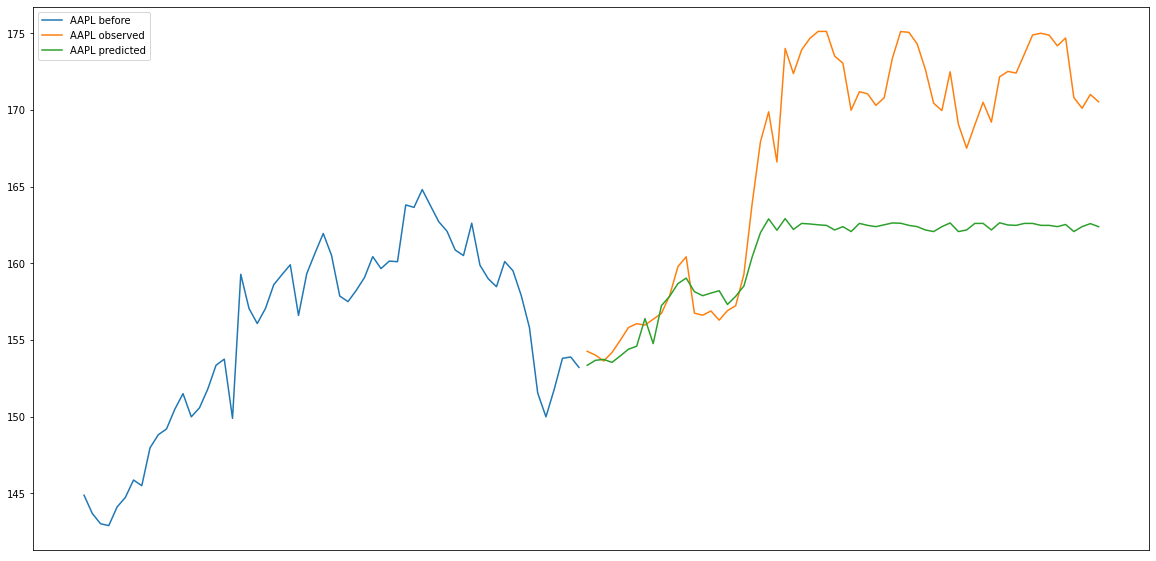

In [ ]:
# visualize the predicted data

plt.figure(figsize = (20,10))
plt.plot(y_train.loc[y_train.index > '2017-07-01'], label = 'AAPL before')
plt.plot(y_valid.index, y_valid.values, label = 'AAPL observed')
plt.plot(pred.index, pred.values, label = 'AAPL predicted')
plt.plot()
plt.legend()
plt.xticks([])
plt.show()

In [ ]:
# from sklearn.metrics import mean_absolute_error
score = []
predict = pd.DataFrame()

for c in data.columns: # for all columns
    
    # pre-processing data
    df_forecasting = pd.DataFrame(data[c])
    df_forecasting["var_diff"] = df_forecasting[c].diff() 

    for i in range(5,0,-1): 
        df_forecasting['t-'+str(i)] = df_forecasting[c].shift(i) 
    
    df_forecasting=df_forecasting.dropna()
    df_forecasting["var_rolling"] = df_forecasting[c].rolling(window = 80).mean() # 전체 변수에 대한 rolling mean
    df_forecasting= df_forecasting.dropna()
    
    # set X and Y value 
    x = df_forecasting.iloc[:,1:]
    y = df_forecasting.iloc[:,0]
    
    # split the train and valid data
    x_train, x_valid = x.loc[x.index < '2017-10-01'], x.loc[x.index >= '2017-10-01']
    y_train, y_valid = y.loc[y.index < '2017-10-01'], y.loc[y.index >= '2017-10-01'] # 2017년 10월 1일을 기준으로 앞 데이터를 학습 데이터, 뒤 데이터를 검증 데이터로 사용
    
    # modeling RF
    mdl = RandomForestRegressor(n_estimators=100) 
    mdl.fit(x_train, y_train) 
    pred = mdl.predict(x_valid) 
    predict[c+"_valid"] = y_valid.values 
    predict[c+"_predict"] = pred 
    
    # calculate the accuracy (score)
    s = mdl.score(x_valid, y_valid)
    score.append([c, s])

predict = predict.set_index(y_valid.index)
pred = pd.Series(pred, index = y_valid.index)
score = pd.DataFrame(score, columns=["Asset", "Score"]) # 예측 결정 계수(R^2): 모델 사용을 통해 잔차를 얼마나 줄일 수 있는지에 대한 척도
score = score.set_index("Asset")

In [ ]:
predict

,AABA_valid,AABA_predict,AAPL_valid,AAPL_predict,AMZN_valid,AMZN_predict,AXP_valid,AXP_predict,BA_valid,BA_predict,...,UNH_valid,UNH_predict,UTX_valid,UTX_predict,VZ_valid,VZ_predict,WMT_valid,WMT_predict,XOM_valid,XOM_predict
Date,,,,,,,,,,,,,,,,,,,,,
2017-10-02,66.60,66.0792,154.26,153.4370,964.00,962.2747,90.04,89.9418,253.85,255.0063,...,195.82,194.9880,115.32,115.1735,49.30,49.3249,78.85,78.8148,81.94,81.8461
2017-10-03,67.19,66.6139,154.01,153.7411,958.00,964.7603,90.44,90.3270,254.65,255.0778,...,196.59,195.1729,116.14,116.1188,49.39,49.3873,77.90,78.0373,81.30,81.2020
2017-10-04,67.79,66.8975,153.63,153.6434,954.21,954.3127,90.59,90.6756,255.99,255.3300,...,197.50,197.1136,118.00,117.7389,49.45,49.4990,78.83,78.7397,81.41,81.4215
2017-10-05,67.75,66.8154,154.18,153.6428,970.00,961.1727,91.60,91.4861,256.12,255.3689,...,199.03,197.8326,117.87,117.7614,49.64,49.6048,79.27,79.5070,81.80,81.8098
2017-10-06,67.49,66.6896,154.97,154.0950,975.64,975.6832,90.96,91.1053,255.28,255.3761,...,199.93,197.7977,117.63,117.5608,49.96,49.9114,79.17,79.1406,81.72,81.7483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,71.42,66.5615,174.68,162.6616,1172.08,1037.6917,99.05,94.3430,298.05,254.9914,...,223.12,197.4482,127.25,123.0444,52.81,52.7575,99.00,88.1225,83.35,83.4135
2017-12-26,70.94,66.2971,170.80,161.8545,1168.36,1037.6917,98.47,94.6656,296.33,254.9574,...,222.00,197.3989,127.52,123.0880,53.11,53.2230,98.29,88.0860,83.88,83.8237
2017-12-27,69.77,66.0621,170.10,162.3994,1179.91,1047.8230,98.80,95.1009,295.54,254.9914,...,219.09,196.1794,127.45,123.0409,53.13,52.9139,98.35,88.3211,83.96,83.9324


In [ ]:
score.sort_values(by='Score', ascending=False) # sorting for top accuracy

,Score
Asset,
VZ,0.996975
XOM,0.995562
NKE,0.994043
GE,0.990862
MRK,0.982426
PG,0.979596
DIS,0.978125
CVX,0.974742
IBM,0.919749


In [ ]:
print("Max is:", score[score["Score"]==score.max()[0]].index) # predicted well
print("Min is:", score[score["Score"]==score.min()[0]].index) # predicted (not good)

Max is: Index(['VZ'], dtype='object', name='Asset')
Min is: Index(['INTC'], dtype='object', name='Asset')


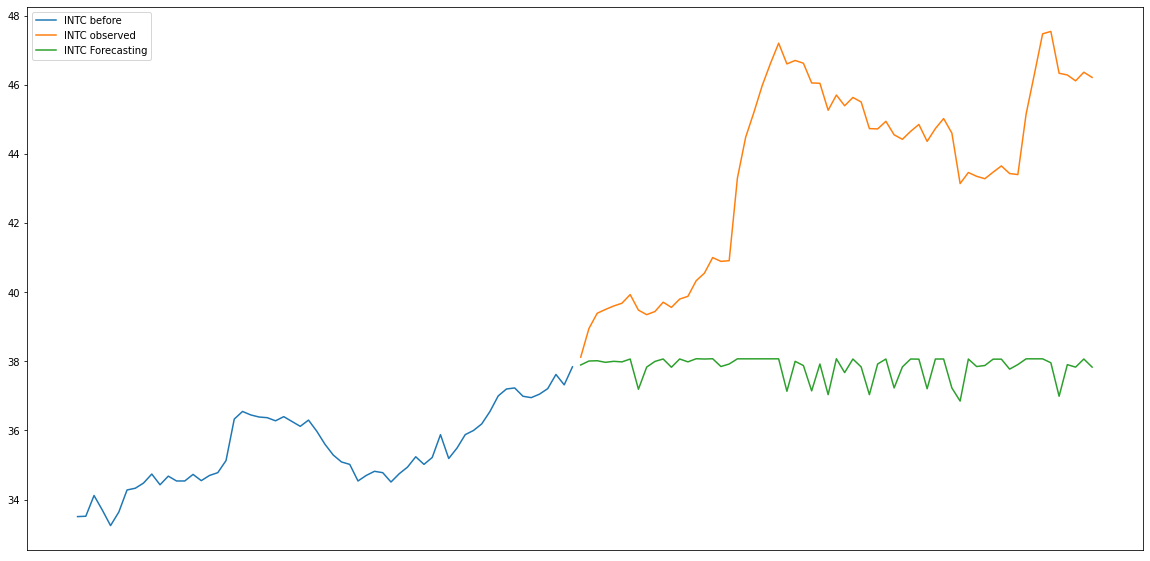

In [ ]:
# visualize the worst prediction (INTC)

plt.figure(figsize = (20,10))
plt.plot(data["INTC"].loc['2017-07-01':'2017-10-01'], label = 'INTC before')
plt.plot(predict["INTC_valid"], label = 'INTC observed')
plt.plot(predict["INTC_predict"], label = 'INTC Forecasting')
plt.plot()
plt.legend()
plt.xticks([])
plt.show()

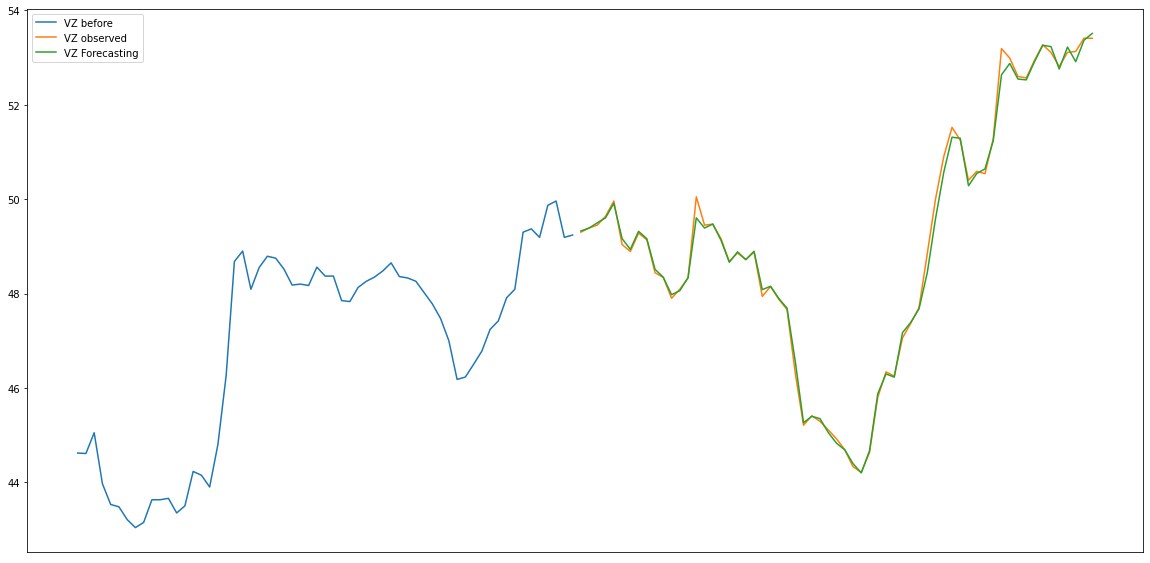

In [ ]:
# visualize the best prediction (VZ)

plt.figure(figsize = (20,10))
plt.plot(data["VZ"].loc['2017-07-01':'2017-10-01'], label = 'VZ before')
plt.plot(predict["VZ_valid"], label = 'VZ observed')
plt.plot(predict["VZ_predict"], label = 'VZ Forecasting')
plt.plot()
plt.legend()
plt.xticks([])
plt.show()